## Histogram


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as Image
import collections
import cv2

In [245]:
#functions
def RGB_to_GRAY(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])


def readImage(image_url,nBin, doBinning):
    img_raw = Image.imread(image_url,0) 
    gray_img = RGB_to_GRAY(img_raw)
    
    plt.title("Orignal image")
    plt.imshow(gray_img, cmap = plt.get_cmap('gray'))
    plt.show()
    
    image_1D = sorted(gray_img.ravel())
    counter=collections.Counter(image_1D)
    hist_list = list(counter.keys())
    freq_list = list(counter.values())
    
    if doBinning:
        intensityBins = [hist_list[i:i+nBin] for i in range(0,len(hist_list),nBin)]
        frequencyBins = [freq_list[i:i+nBin] for i in range(0,len(freq_list),nBin)]
        hist_with_bins = []
        freq_with_bins = []
        for i in intensityBins:
            frequencySum = 0
            hist_with_bins.append(i[len(i) - 1])
            for x in i:
                frequencySum += counter[x]
            freq_with_bins.append(frequencySum)
    else:
        hist_with_bins = hist_list
        freq_with_bins = freq_list
    return hist_with_bins, freq_with_bins, gray_img

def readImage_Array(image_1D,nBin, doBinning):

    image_1D = sorted(image_1D.ravel()) 
    counter=collections.Counter(image_1D)
    hist_list = list(counter.keys())
    freq_list = list(counter.values())
    
    if doBinning:
        intensityBins = [hist_list[i:i+nBin] for i in range(0,len(hist_list),nBin)]
        frequencyBins = [freq_list[i:i+nBin] for i in range(0,len(freq_list),nBin)]
        hist_with_bins = []
        freq_with_bins = []
        for i in intensityBins:
            frequencySum = 0
            hist_with_bins.append(i[len(i) - 1])
            for x in i:
                frequencySum += counter[x]
            freq_with_bins.append(frequencySum)
    else:
        hist_with_bins = hist_list
        freq_with_bins = freq_list
    return hist_with_bins, freq_with_bins


def displayHistogram(hist_list,freq_list):
    plt.xlabel("Intensity")
    plt.ylabel
    plt.title('Histogram of image')
    plt.bar(hist_list,freq_list)
    plt.show()
     
    
def plotPDF(freq_list):
    size = sum(freq_list)
    pdf_image =[]
    pdf_image = [x / size for x in freq_list]
    return pdf_image

def plotCDF(pdf_image):
    cdf_list = list()
    tempSum = 0
    for idx, freq in enumerate(pdf_image):
        tempSum += freq
        cdf_list.append(tempSum)
    return(cdf_list)




def match_hist(image1, image2):
    
    image1 = image1.ravel()
    image2 = image2.ravel()
    
    image1values, idx, image1counts = np.unique(image1, return_inverse=True, return_counts=True)
    image2values, image2counts = np.unique(image2, return_counts=True)
    
    image1shape = image1.shape
    image2quantiles = np.cumsum(image2counts).astype(np.float64)
    image2quantiles /= image2quantiles[-1]
    
    image1quantiles = np.cumsum(image1counts).astype(np.float64)
    image1quantiles /= image1quantiles[-1]
    
    image2InterpVal = np.interp(image1quantiles, image2quantiles, image2values)

    return image2InterpVal[idx].reshape(image1shape)

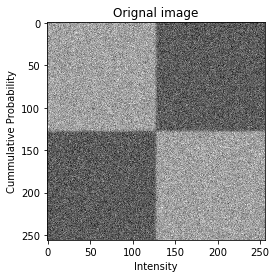

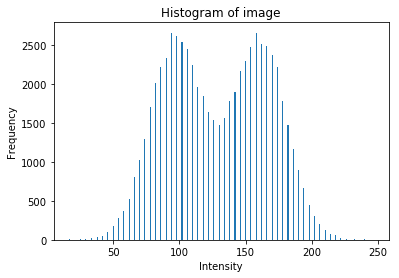

In [175]:
hist_list, freq_list,_ = readImage('checker128-var20.png',nBin=4,doBinning=True)
displayHistogram(hist_list,freq_list)

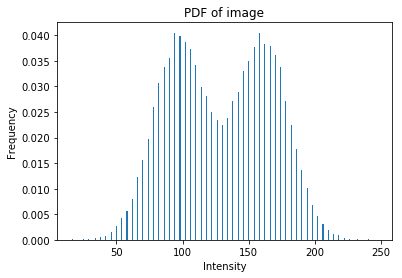

In [176]:
pdf_image = plotPDF(freq_list)
plt.title('PDF of image')
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.bar(hist_list,pdf_image)
plt.show()

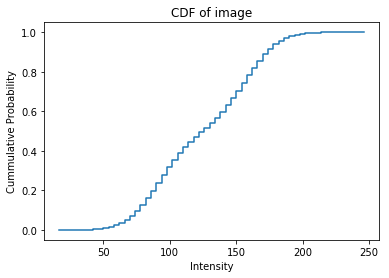

In [177]:
cdf_image = plotCDF(pdf_image)
plt.title('CDF of image')
plt.xlabel("Intensity")
plt.ylabel("Cummulative Probability")
plt.step(hist_list,cdf_image)
plt.show()

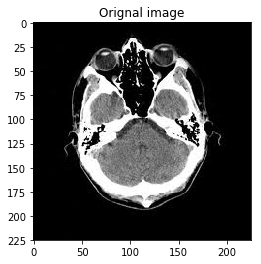

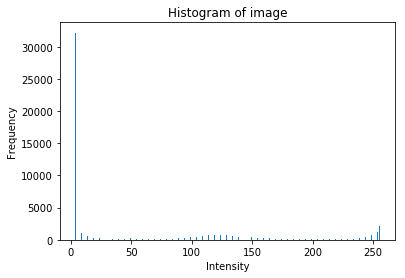

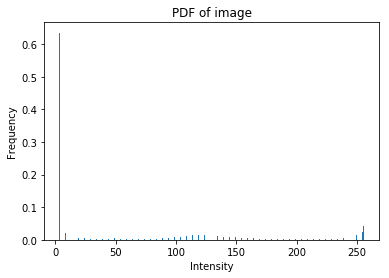

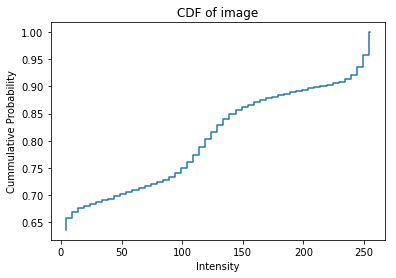

52


In [179]:
hist_list, freq_list,_ = readImage('CTscan.jpg',nBin=5,doBinning=True)
displayHistogram(hist_list,freq_list)

pdf_image = plotPDF(freq_list)
plt.title('PDF of image')
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.bar(hist_list,pdf_image)
plt.show()

cdf_image = plotCDF(pdf_image)
plt.title('CDF of image')
plt.xlabel("Intensity")
plt.ylabel("Cummulative Probability")
plt.step(hist_list,cdf_image)
plt.show()
print(len(cdf_image))

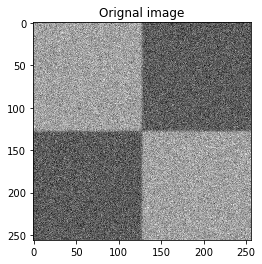

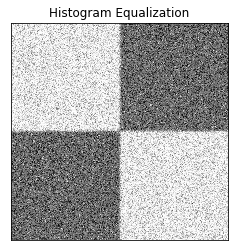

In [197]:
#Histogram Equalisation 
# img_raw = Image.imread('checker128-var20.png',0) 
# gray_img_equ = RGB_to_GRAY(img_raw)

hist_list,freq_list,gray_img_equ = readImage('checker128-var20.png',nBin=1,doBinning=False)
pdf_image = plotPDF(freq_list)
cdf_image = plotCDF(pdf_image)
# print(len(cdf_image))

def hist_Equalisation(cdf_image):
    cdf_image = [e*255/cdf_image[-1] for e in cdf_image]
    image_equalized = np.interp(gray_img_equ, range(0,217), cdf_image)
#     print(len(cdf_image))
    return image_equalized
    
    
image_equalized = hist_Equalisation(cdf_image)

plt.imshow(image_equalized, cmap = 'gray')
plt.xticks([]), plt.yticks([])

plt.title('Histogram Equalization')
plt.show()



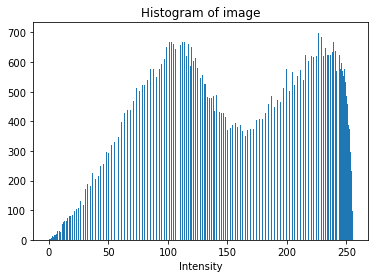

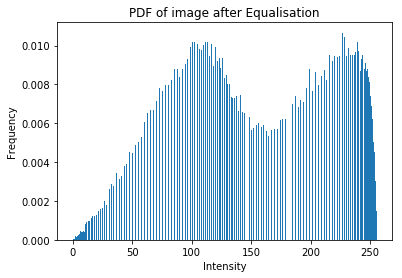

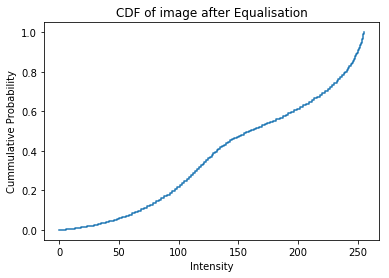

In [213]:
#PDF CDF of Image After Equalisation
hist_equ,freq_equ = readImage_Array(image_equalized,nBin=1,doBinning=True)

displayHistogram(hist_equ,freq_equ)

pdf_image = plotPDF(freq_equ)
plt.title('PDF of image after Equalisation')
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.bar(hist_equ,pdf_image)
plt.show()

cdf_image = plotCDF(pdf_image)
plt.title('CDF of image after Equalisation')
plt.xlabel("Intensity")
plt.ylabel("Cummulative Probability")
plt.step(hist_equ,cdf_image)
plt.show()
# print(len(cdf_image))

In [ ]:
#Histogram Matching

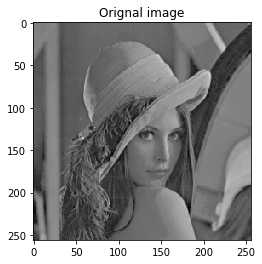

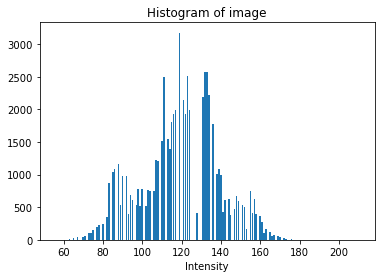

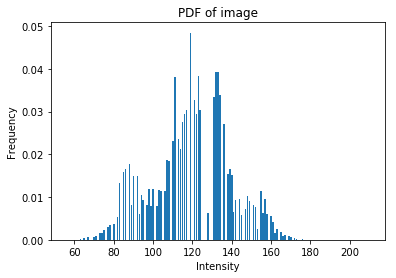

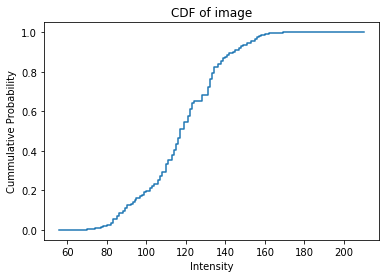

In [252]:
# Load Image 1
hist, freq , gray0= readImage('pic00.png',nBin=1, doBinning=False)
#Histogram, PDF, CDF of image 1

displayHistogram(hist,freq)

pdf_image = plotPDF(freq)
plt.title('PDF of image')
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.bar(hist,pdf_image)
plt.show()

cdf_image = plotCDF(pdf_image)
plt.title('CDF of image')
plt.xlabel("Intensity")
plt.ylabel("Cummulative Probability")
plt.step(hist,cdf_image)
plt.show()


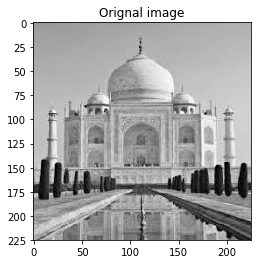

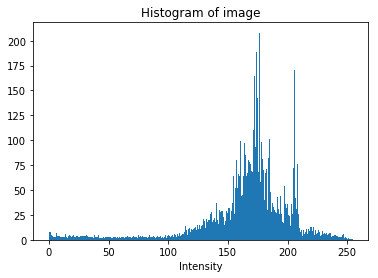

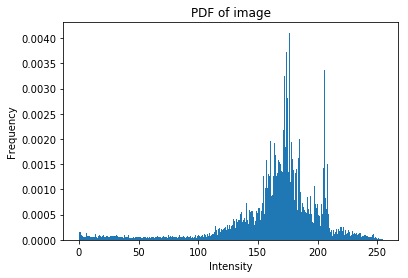

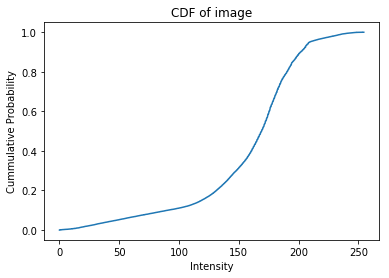

In [256]:
#load Image 2
hist, freq , gray= readImage('Taj.jpg',nBin=1, doBinning=False)
# Histogram PDF CDF 
displayHistogram(hist,freq)

pdf_image = plotPDF(freq)
plt.title('PDF of image')
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.bar(hist,pdf_image)
plt.show()

cdf_image = plotCDF(pdf_image)
plt.title('CDF of image')
plt.xlabel("Intensity")
plt.ylabel("Cummulative Probability")
plt.step(hist,cdf_image)
plt.show()
# print(len(cdf_image))

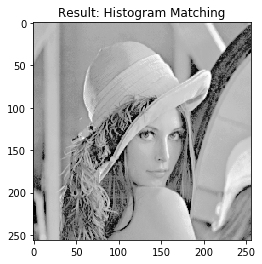

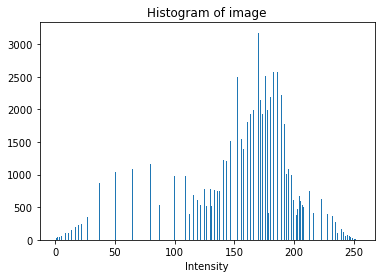

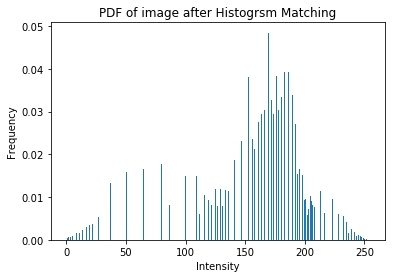

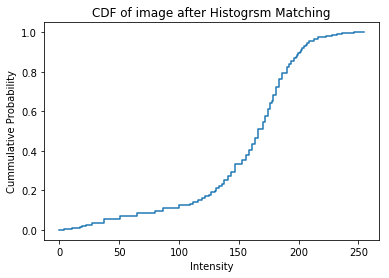

In [257]:
# print(len(gray0), len(gray))
result = match_hist(gray0,gray)
# print(result)
plt.imshow(result, cmap='gray')
plt.title('Result: Histogram Matching')
plt.show()


hist_res,freq_res = readImage_Array(result,nBin=1,doBinning=False)

displayHistogram(hist_res,freq_res)

pdf_image = plotPDF(freq_res)
plt.title('PDF of image after Histogrsm Matching')
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.bar(hist_res,pdf_image)
plt.show()

cdf_image = plotCDF(pdf_image)
plt.title('CDF of image after Histogrsm Matching')
plt.xlabel("Intensity")
plt.ylabel("Cummulative Probability")
plt.step(hist_res,cdf_image)
plt.show()
# print(len(cdf_image))